In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [2]:
df = pd.read_csv('./everytime_yongin.csv')
df

,Unnamed: 0,0,1,2,3,4
0,0,13,18,2020/50분 전,아 진짜 비대면충들 레전드다 ㅋㅋ,예전부터 진짜 좀만 퍼지기만 하면 불안하다 글 싸지르네 특히 인문캠은 레전드네 그때...
1,1,0,2,2020/11/19 13:11,코로나도 천연두처럼 없애버릴 수 있을까,천연두는 종식시킬때까지 미국이랑 소련이 ㄹㅇ 똥꼬쇼 했는데 미국이랑 중국이 이번에도...
2,2,0,6,2020/11/19 10:16,끝날줄 모르는 코로나,군대가 답이다^^
3,3,0,2,2020/11/19 09:53,코로나 300명대,1주일동안 지속되면 2단계된다는데 그래도 대면 하려나..
4,4,0,2,2020/11/19 09:22,신촌에서,연세대 공대 소모임하다가 11명 코로나 걸렸대 개무섭
...,...,...,...,...,...,...
640,640,0,9,2020/01/27 10:37,코로나 때문에 글올립니다.,혹시 중국인 유학생 계속 받을려나. 이번에 기숙사 들어가는데 이러면 솔직히 걱정이 ...
641,641,2,1,2020/01/26 15:26,충남도 여행사·관광객에 양해 구하고 취소요청,(홍성=연합뉴스) 양영석 기자 = '우한 폐렴'으로 불리는 신종 코로나바이러스 확산...
642,642,0,6,2020/01/26 10:27,코로나 예방수칙,감염루트가 비말감염 인지라 마스크만 잘 쓰고 손만 잘 씻으면 예방하는게 그다지 어렵...
643,643,0,5,2020/01/26 10:00,코로나때문에,알바하는데 손님없다 ㅋㅋㅋㅋㅋㅋ


### 데이터 전처리 

In [3]:
df = df.dropna(how = 'any')
df['4'] = df['4'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 에브리타임 본문 내용

okt = Okt()
tokenized_data = []

for sentence in df['4']:
    temp_X = okt.nouns(sentence) # 명사만 추출
    temp_X = [word for word in temp_X if len(word)>1] # 2글자 이상만 추출
    tokenized_data.append(temp_X)

pd.DataFrame(tokenized_data).to_csv('./everytime_yongin_tokenized.csv')

In [4]:
pd.DataFrame(tokenized_data)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,예전,진짜,인문,레전드,그때,이태원,신천지,교회,확산,None,...,None,None,None,None,None,None,None,None,None,None
1,천연두,종식,미국,소련,똥꼬,미국,중국,이번,똥꼬,신종플루,...,None,None,None,None,None,None,None,None,None,None
2,군대,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,주일,동안,지속,단계,대면,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,연세대,공대,모임,다가,코로나,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,혹시,중국인,유학생,계속,이번,기숙사,걱정,중국,내부,조치,...,리저,None,None,None,None,None,None,None,None,None
641,홍성,연합뉴스,영석,기자,우한,폐렴,신종,코로나바이러스,확산,우려,...,예정,중국,관광객,명의,충남,지역,방문,None,None,None
642,감염,루트,비말,감염,인지,마스크,예방,그다지,걱정,None,...,None,None,None,None,None,None,None,None,None,None
643,알바,손님,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


### 응집도 

In [5]:
conda install -c conda-forge pyldavis

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


100%|████████████████████████████████████████████████████████████████████████████| 646/646 [00:00<00:00, 319518.91it/s]
2020-11-22 13:50:06,304 : INFO : using symmetric alpha at 0.5
2020-11-22 13:50:06,306 : INFO : using symmetric eta at 0.5
2020-11-22 13:50:06,309 : INFO : using serial LDA version on this node
2020-11-22 13:50:06,312 : INFO : running online (single-pass) LDA training, 2 topics, 1 passes over the supplied corpus of 646 documents, updating model once every 646 documents, evaluating perplexity every 646 documents, iterating 50x with a convergence threshold of 0.001000
2020-11-22 13:50:06,313 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy


Number of unique tokens: 44
Number of documents: 646


2020-11-22 13:50:06,682 : INFO : -4.499 per-word bound, 22.6 perplexity estimate based on a held-out corpus of 646 documents with 728 words
2020-11-22 13:50:06,683 : INFO : PROGRESS: pass 0, at document #646/646
2020-11-22 13:50:06,979 : INFO : topic #0 (0.500): 0.066*"우리" + 0.056*"명지대" + 0.049*"수업" + 0.048*"원래" + 0.040*"이번" + 0.040*"개강" + 0.036*"만원" + 0.036*"지금" + 0.035*"학생" + 0.035*"지급"
2020-11-22 13:50:06,981 : INFO : topic #1 (0.500): 0.057*"등록금" + 0.049*"학생" + 0.045*"진자" + 0.042*"지금" + 0.038*"휴학" + 0.034*"과제" + 0.029*"학년" + 0.029*"그냥" + 0.029*"상황" + 0.029*"개강"
2020-11-22 13:50:06,982 : INFO : topic diff=0.490742, rho=1.000000
2020-11-22 13:50:06,985 : INFO : using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
2020-11-22 13:50:11,529 : INFO : 3 accumulators retrieved from output queue
2020-11-22 13:50:11,543 : INFO : accumulated word occurrence stats for 334 virtual documents
2020-11-22 13:50:11,664 : INFO : using symme

2020-11-22 13:50:38,446 : INFO : topic #4 (0.038): 0.115*"시간" + 0.115*"수업" + 0.092*"과제" + 0.070*"우리" + 0.070*"연기" + 0.047*"중국" + 0.047*"등록금" + 0.047*"정도" + 0.047*"개강" + 0.047*"진자"
2020-11-22 13:50:38,458 : INFO : topic #2 (0.038): 0.110*"연기" + 0.110*"일단" + 0.110*"지급" + 0.110*"시간" + 0.074*"대학" + 0.074*"중국" + 0.074*"정도" + 0.038*"학생" + 0.038*"특별" + 0.038*"보고"
2020-11-22 13:50:38,467 : INFO : topic #8 (0.038): 0.195*"공지" + 0.147*"지금" + 0.099*"혹시" + 0.099*"이번" + 0.099*"중국" + 0.050*"지급" + 0.050*"교수" + 0.050*"강의" + 0.050*"수업" + 0.050*"정도"
2020-11-22 13:50:38,470 : INFO : topic #11 (0.038): 0.280*"만원" + 0.106*"수업" + 0.071*"개강" + 0.036*"특별" + 0.036*"관련" + 0.036*"지금" + 0.036*"학년" + 0.036*"계속" + 0.036*"대학" + 0.036*"상황"
2020-11-22 13:50:38,474 : INFO : topic #9 (0.038): 0.146*"휴학" + 0.146*"정도" + 0.074*"지급" + 0.074*"올해" + 0.074*"생활" + 0.074*"원래" + 0.038*"우리" + 0.038*"대학" + 0.038*"대한" + 0.038*"알바"
2020-11-22 13:50:38,478 : INFO : topic diff=16.771988, rho=1.000000
2020-11-22 13:50:38,489 : INFO : us

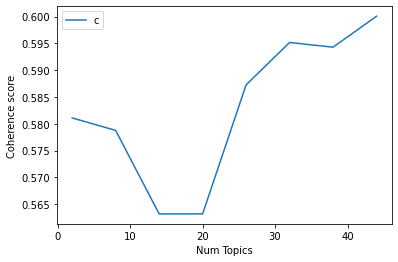

In [6]:
from tqdm import tqdm
from gensim.models.ldamodel import LdaModel 
from gensim.models.callbacks import CoherenceMetric 
from gensim import corpora 
from gensim.models.callbacks import PerplexityMetric 
import logging 
import pyLDAvis.gensim 
from gensim.models.coherencemodel import CoherenceModel 
import matplotlib.pyplot as plt 

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3): 
    coherence_values = [] 
    model_list = [] 
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model) 
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence()) 
    return model_list, coherence_values 

def find_optimal_number_of_topics(dictionary, corpus, processed_data): 
    limit = 50; #토픽 마지막갯수
    start = 2; #토픽 시작갯수
    step = 6; 
    model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, 
                                                            texts=processed_data, start=start, limit=limit, step=step) 
    x = range(start, limit, step) 
    plt.plot(x, coherence_values) 
    plt.xlabel("Num Topics") 
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best') 
    plt.show() 


processed_data = [sent.strip().split(",") for sent in tqdm(open('./everytime_yongin_tokenized.csv', 'r', encoding='utf-8').readlines())]
dictionary = corpora.Dictionary(processed_data) # 출현빈도가 적거나 자주 등장하는 단어는 제거 
dictionary.filter_extremes(no_below=10, no_above=0.05)
corpus = [dictionary.doc2bow(text) for text in processed_data]
print('Number of unique tokens: %d' % len(dictionary)) 
print('Number of documents: %d' % len(corpus))
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO) 
    
# 최적의 토픽 수 찾기 
find_optimal_number_of_topics(dictionary, corpus, processed_data)

### LDA 시각화 

In [7]:
!pip install pyLDAvis

In [12]:
import gensim
NUM_TOPICS = 33 
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

2020-11-22 13:54:54,646 : INFO : using symmetric alpha at 0.030303030303030304
2020-11-22 13:54:54,648 : INFO : using symmetric eta at 0.030303030303030304
2020-11-22 13:54:54,649 : INFO : using serial LDA version on this node
2020-11-22 13:54:54,652 : INFO : running online (multi-pass) LDA training, 33 topics, 15 passes over the supplied corpus of 646 documents, updating model once every 646 documents, evaluating perplexity every 646 documents, iterating 50x with a convergence threshold of 0.001000
2020-11-22 13:54:54,926 : INFO : -10.706 per-word bound, 1670.7 perplexity estimate based on a held-out corpus of 646 documents with 728 words
2020-11-22 13:54:54,927 : INFO : PROGRESS: pass 0, at document #646/646
2020-11-22 13:54:55,068 : INFO : topic #14 (0.030): 0.321*"알바" + 0.163*"개강" + 0.163*"그냥" + 0.163*"우리" + 0.005*"명지대" + 0.005*"특별" + 0.005*"시간" + 0.005*"학우" + 0.005*"대학" + 0.005*"정도"
2020-11-22 13:54:55,069 : INFO : topic #13 (0.030): 0.218*"감염" + 0.110*"중국" + 0.110*"그냥" + 0.110*"지

2020-11-22 13:54:57,901 : INFO : topic #19 (0.030): 0.784*"휴학" + 0.101*"지급" + 0.035*"대한" + 0.006*"학우" + 0.006*"등록금" + 0.006*"학생" + 0.006*"그냥" + 0.005*"특별" + 0.004*"올해" + 0.003*"현재"
2020-11-22 13:54:57,904 : INFO : topic #29 (0.030): 0.859*"명지대" + 0.022*"계속" + 0.019*"졸업" + 0.009*"혹시" + 0.009*"학우" + 0.008*"학생" + 0.008*"과제" + 0.008*"생활" + 0.006*"이번" + 0.005*"그냥"
2020-11-22 13:54:57,910 : INFO : topic diff=0.681250, rho=0.353553
2020-11-22 13:54:58,260 : INFO : -4.671 per-word bound, 25.5 perplexity estimate based on a held-out corpus of 646 documents with 728 words
2020-11-22 13:54:58,261 : INFO : PROGRESS: pass 7, at document #646/646
2020-11-22 13:54:58,367 : INFO : topic #17 (0.030): 0.638*"감염" + 0.131*"개강" + 0.068*"중국" + 0.067*"수업" + 0.006*"상황" + 0.004*"진자" + 0.004*"강의" + 0.003*"학생" + 0.003*"정도" + 0.003*"지금"
2020-11-22 13:54:58,368 : INFO : topic #1 (0.030): 0.467*"대한" + 0.330*"생활" + 0.072*"대학" + 0.048*"수업" + 0.028*"학년" + 0.003*"공지" + 0.002*"개강" + 0.002*"진자" + 0.001*"정도" + 0.001*"등록금"

2020-11-22 13:55:01,162 : INFO : topic #5 (0.030): 0.935*"등록금" + 0.010*"수업" + 0.004*"우리" + 0.004*"대학" + 0.002*"학우" + 0.002*"올해" + 0.002*"생활" + 0.002*"지급" + 0.001*"학년" + 0.001*"관련"
2020-11-22 13:55:01,166 : INFO : topic #32 (0.030): 0.690*"이제" + 0.174*"수업" + 0.059*"연기" + 0.003*"진자" + 0.003*"비대" + 0.002*"그냥" + 0.002*"학생" + 0.002*"시간" + 0.002*"대한" + 0.002*"개강"
2020-11-22 13:55:01,172 : INFO : topic diff=0.318737, rho=0.258199
2020-11-22 13:55:01,433 : INFO : -4.434 per-word bound, 21.6 perplexity estimate based on a held-out corpus of 646 documents with 728 words
2020-11-22 13:55:01,435 : INFO : PROGRESS: pass 14, at document #646/646
2020-11-22 13:55:01,566 : INFO : topic #23 (0.030): 0.049*"정도" + 0.033*"등록금" + 0.029*"이번" + 0.023*"그냥" + 0.023*"대한" + 0.023*"학우" + 0.023*"한번" + 0.022*"언제" + 0.022*"상황" + 0.022*"원래"
2020-11-22 13:55:01,568 : INFO : topic #26 (0.030): 0.541*"학년" + 0.400*"보고" + 0.013*"생활" + 0.001*"올해" + 0.001*"등록금" + 0.001*"진자" + 0.001*"명지대" + 0.001*"특별" + 0.001*"상황" + 0.001*"원

(24, '0.669*"정도" + 0.283*"연기" + 0.003*"대학" + 0.002*"현재"')
(3, '0.942*"진자" + 0.003*"그냥" + 0.002*"개강" + 0.002*"대한"')
(5, '0.940*"등록금" + 0.008*"수업" + 0.003*"우리" + 0.003*"대학"')
(13, '0.380*"감염" + 0.193*"그냥" + 0.193*"중국" + 0.006*"지급"')
(21, '0.631*"만원" + 0.315*"졸업" + 0.003*"지금" + 0.003*"원래"')
(4, '0.452*"혹시" + 0.411*"언제" + 0.083*"지급" + 0.003*"공지"')
(32, '0.691*"이제" + 0.174*"수업" + 0.059*"연기" + 0.003*"진자"')
(19, '0.817*"휴학" + 0.103*"지급" + 0.035*"대한" + 0.001*"학우"')
(22, '0.527*"개강" + 0.261*"올해" + 0.119*"연기" + 0.032*"계속"')
(16, '0.793*"강의" + 0.142*"수업" + 0.003*"지금" + 0.003*"등록금"')
(25, '0.560*"그냥" + 0.397*"일단" + 0.001*"학년" + 0.001*"강의"')
(8, '0.542*"시간" + 0.416*"교수" + 0.002*"계속" + 0.001*"명지대"')
(31, '0.942*"원래" + 0.002*"지금" + 0.002*"시간" + 0.002*"알바"')
(26, '0.541*"학년" + 0.400*"보고" + 0.013*"생활" + 0.001*"올해"')
(6, '0.589*"이번" + 0.377*"수업" + 0.001*"등록금" + 0.001*"휴학"')
(7, '0.631*"상황" + 0.317*"중국" + 0.002*"우리" + 0.001*"격리"')
(12, '0.032*"학생" + 0.027*"휴학" + 0.027*"한번" + 0.026*"혹시"')
(2, '0.498*"관련" 

In [13]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

In [10]:
def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()

    
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        

        
        for j, (topic_num, prop_topic) in enumerate(doc): 
            if j == 0:  
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
            else:
                break
    return(topic_table)

In [14]:
topictable = make_topictable_per_doc(ldamodel, corpus)
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable[:33]

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,0.0,0.0303,"[(0, 0.030303031), (1, 0.030303031), (2, 0.030..."
1,1,0.0,0.0303,"[(0, 0.030303031), (1, 0.030303031), (2, 0.030..."
2,2,6.0,0.3434,"[(0, 0.0101010185), (1, 0.0101010185), (2, 0.0..."
3,3,0.0,0.0303,"[(0, 0.030303031), (1, 0.030303031), (2, 0.030..."
4,4,0.0,0.0303,"[(0, 0.030303031), (1, 0.030303031), (2, 0.030..."
5,5,0.0,0.0303,"[(0, 0.030303031), (1, 0.030303031), (2, 0.030..."
6,6,32.0,0.5076,"[(8, 0.25757557), (32, 0.5075757)]"
7,7,30.0,0.5152,"[(0, 0.01515152), (1, 0.01515152), (2, 0.01515..."
8,8,26.0,0.3450,"[(0, 0.010101018), (1, 0.341899), (2, 0.010101..."
9,9,0.0,0.0303,"[(0, 0.030303031), (1, 0.030303031), (2, 0.030..."


In [15]:
for topic in topics:
    print(topic)

(24, '0.669*"정도" + 0.283*"연기" + 0.003*"대학" + 0.002*"현재"')
(3, '0.942*"진자" + 0.003*"그냥" + 0.002*"개강" + 0.002*"대한"')
(5, '0.940*"등록금" + 0.008*"수업" + 0.003*"우리" + 0.003*"대학"')
(13, '0.380*"감염" + 0.193*"그냥" + 0.193*"중국" + 0.006*"지급"')
(21, '0.631*"만원" + 0.315*"졸업" + 0.003*"지금" + 0.003*"원래"')
(4, '0.452*"혹시" + 0.411*"언제" + 0.083*"지급" + 0.003*"공지"')
(32, '0.691*"이제" + 0.174*"수업" + 0.059*"연기" + 0.003*"진자"')
(19, '0.817*"휴학" + 0.103*"지급" + 0.035*"대한" + 0.001*"학우"')
(22, '0.527*"개강" + 0.261*"올해" + 0.119*"연기" + 0.032*"계속"')
(16, '0.793*"강의" + 0.142*"수업" + 0.003*"지금" + 0.003*"등록금"')
(25, '0.560*"그냥" + 0.397*"일단" + 0.001*"학년" + 0.001*"강의"')
(8, '0.542*"시간" + 0.416*"교수" + 0.002*"계속" + 0.001*"명지대"')
(31, '0.942*"원래" + 0.002*"지금" + 0.002*"시간" + 0.002*"알바"')
(26, '0.541*"학년" + 0.400*"보고" + 0.013*"생활" + 0.001*"올해"')
(6, '0.589*"이번" + 0.377*"수업" + 0.001*"등록금" + 0.001*"휴학"')
(7, '0.631*"상황" + 0.317*"중국" + 0.002*"우리" + 0.001*"격리"')
(12, '0.032*"학생" + 0.027*"휴학" + 0.027*"한번" + 0.026*"혹시"')
(2, '0.498*"관련" 